In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
df = pd.read_csv("/content/sample_data/CC GENERAL.csv")


# Display the first few rows of the dataset
print(df.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [2]:
# This function performs a missing value analysis on each column of the dataset, helps you decide on what to do in cleaning process
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

null_cols = null_check(df)

Column Name: CUST_ID
Column DataType: object
Column unique values: ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
Column has null: False


Column Name: BALANCE
Column DataType: float64
Column has null: False


Column Name: BALANCE_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: PURCHASES
Column DataType: float64
Column has null: False


Column Name: ONEOFF_PURCHASES
Column DataType: float64
Column has null: False


Column Name: INSTALLMENTS_PURCHASES
Column DataType: float64
Column has null: False


Column Name: CASH_ADVANCE
Column DataType: float64
Column has null: False


Column Name: PURCHASES_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: ONEOFF_PURCHASES_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: PURCHASES_INSTALLMENTS_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: CASH_ADVANCE_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: CASH_ADVANCE_

In [3]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

def dataframe_summary(df):
    # Ensure numeric data only for outlier calculations
    numeric_df = df.select_dtypes(include=np.number)

    # Variable details
    var_list = df.columns.to_list()
    dtype_list = df.dtypes.to_list()
    null_list = df.isnull().sum().to_list()

    # Outliers IQR
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    k = 1.5
    outlier_list = ((numeric_df < (Q1 - k * IQR)) | (numeric_df > (Q3 + k * IQR))).sum().reindex(df.columns, fill_value=0).to_list()

    # Stacking lists into a dictionary
    summary_dict = {'Variable': var_list, 'Data type': dtype_list, 'Null values': null_list, 'Outliers': outlier_list}

    # Create DataFrame
    summary_df = pd.DataFrame(summary_dict)

    # Optionally remove index from the display
    return summary_df.to_string(index=False)

# Example usage (Make sure df is defined before calling the function)
print(dataframe_summary(df))


                        Variable Data type  Null values  Outliers
                         CUST_ID    object            0         0
                         BALANCE   float64            0       695
               BALANCE_FREQUENCY   float64            0      1493
                       PURCHASES   float64            0       808
                ONEOFF_PURCHASES   float64            0      1013
          INSTALLMENTS_PURCHASES   float64            0       867
                    CASH_ADVANCE   float64            0      1030
             PURCHASES_FREQUENCY   float64            0         0
      ONEOFF_PURCHASES_FREQUENCY   float64            0       782
PURCHASES_INSTALLMENTS_FREQUENCY   float64            0         0
          CASH_ADVANCE_FREQUENCY   float64            0       525
                CASH_ADVANCE_TRX     int64            0       804
                   PURCHASES_TRX     int64            0       766
                    CREDIT_LIMIT   float64            1       248
          

In [4]:
df = df.drop(['CUST_ID'],axis = 1)


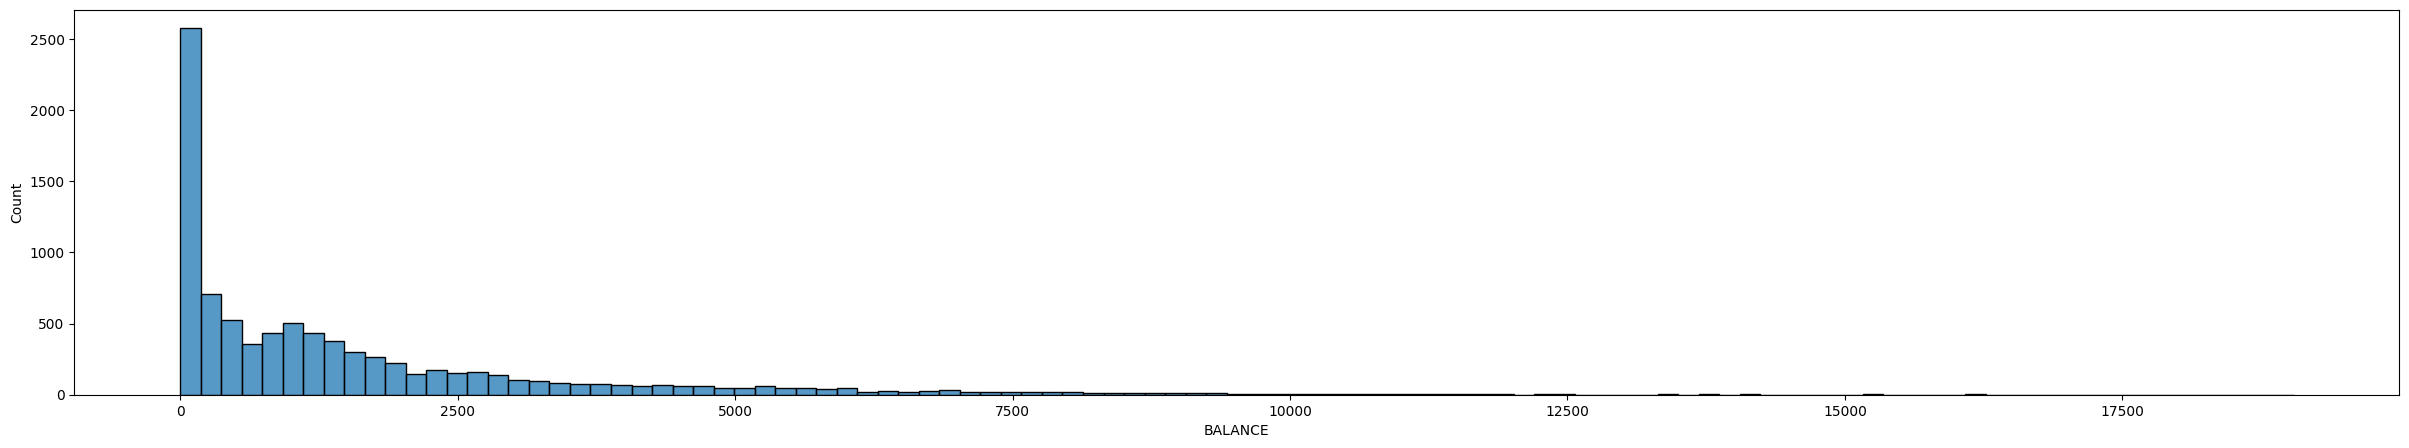

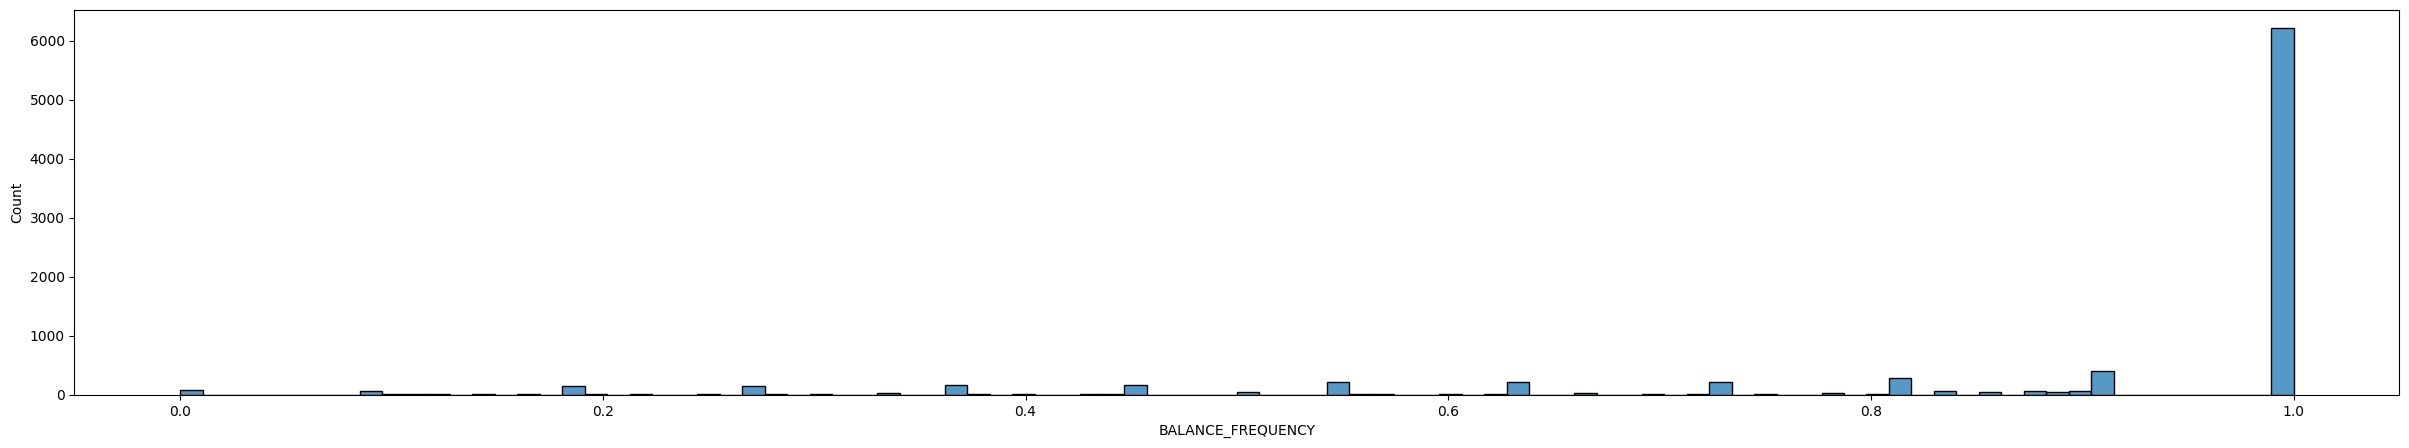

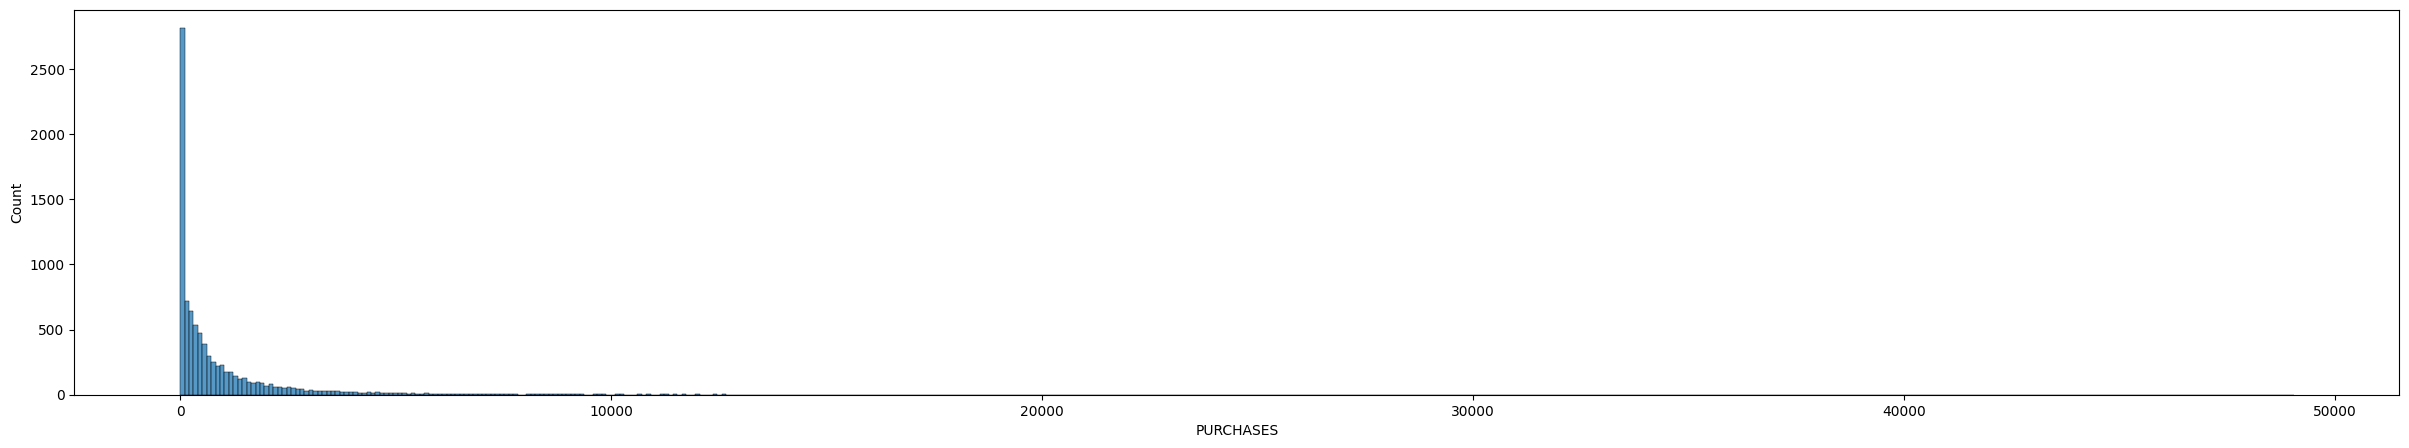

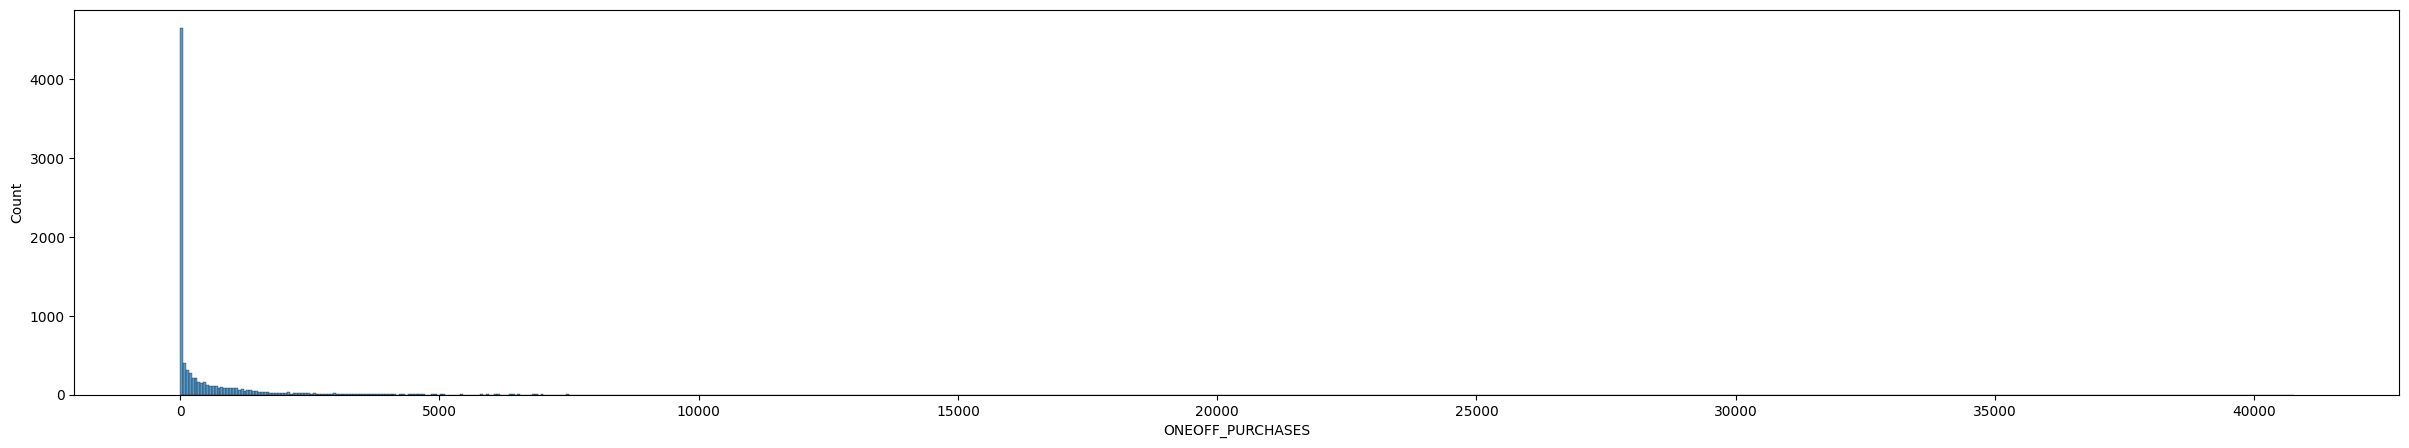

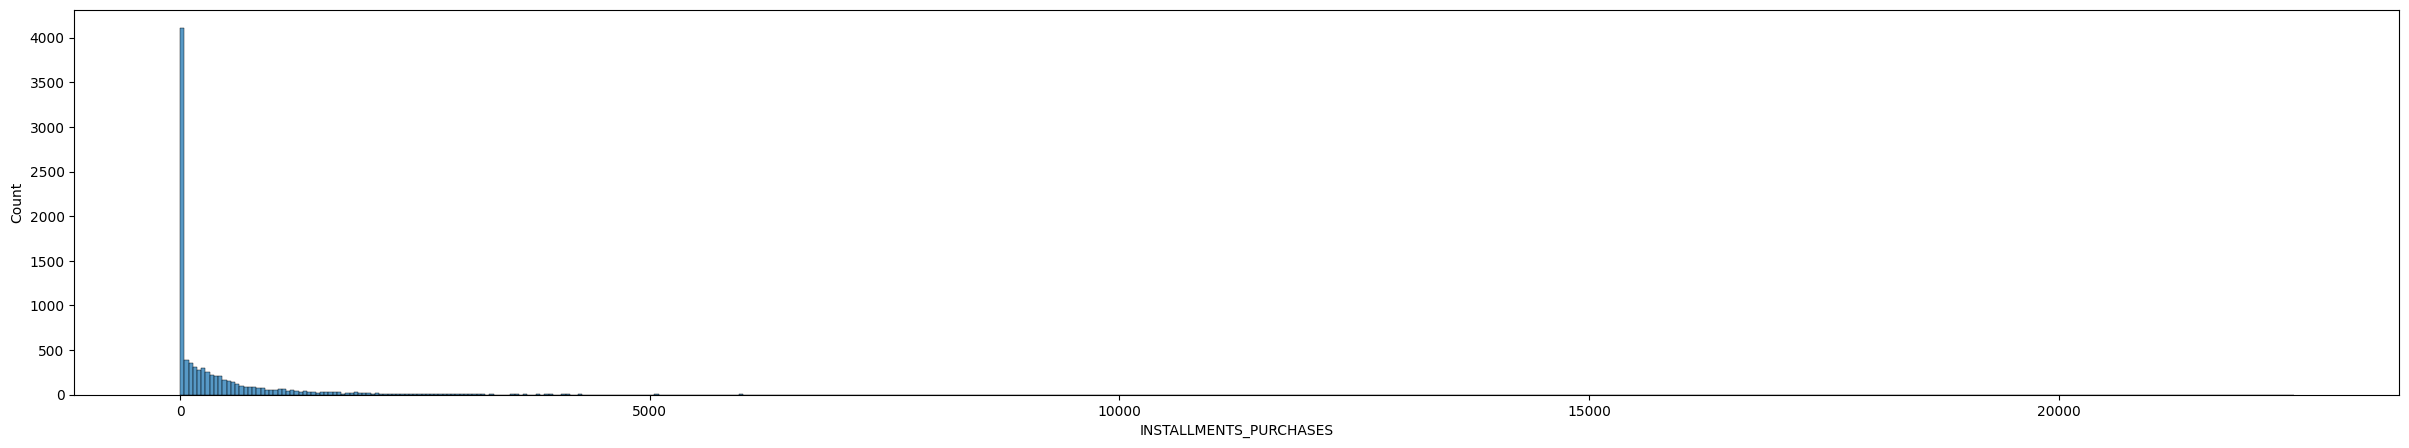

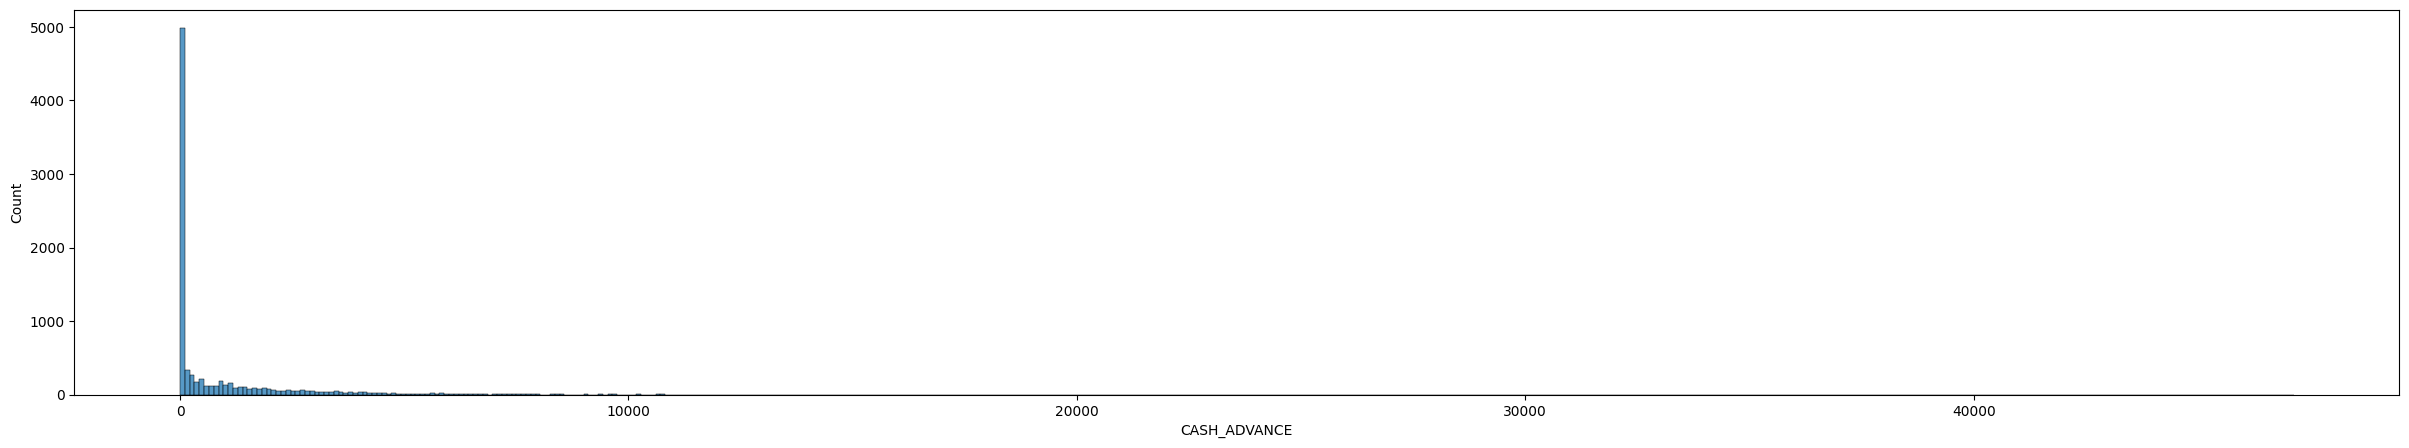

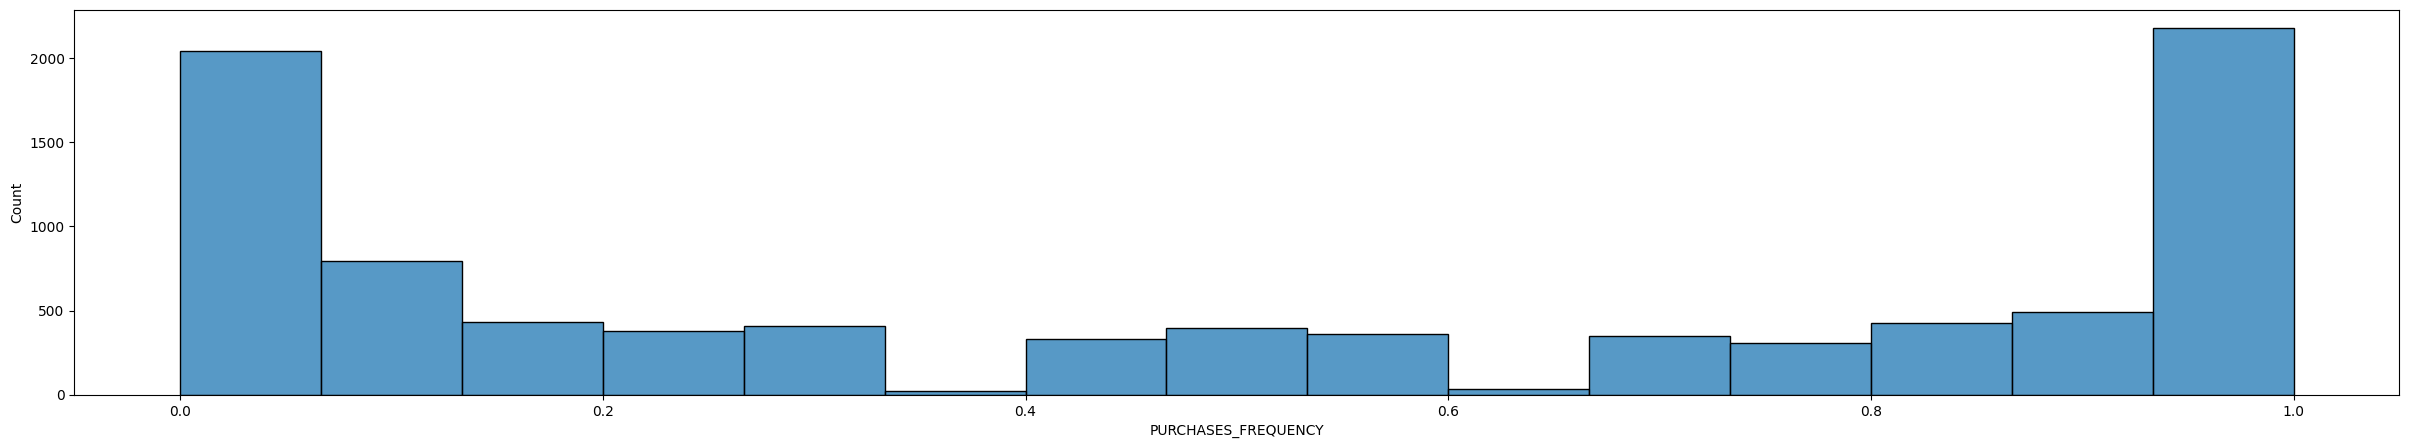

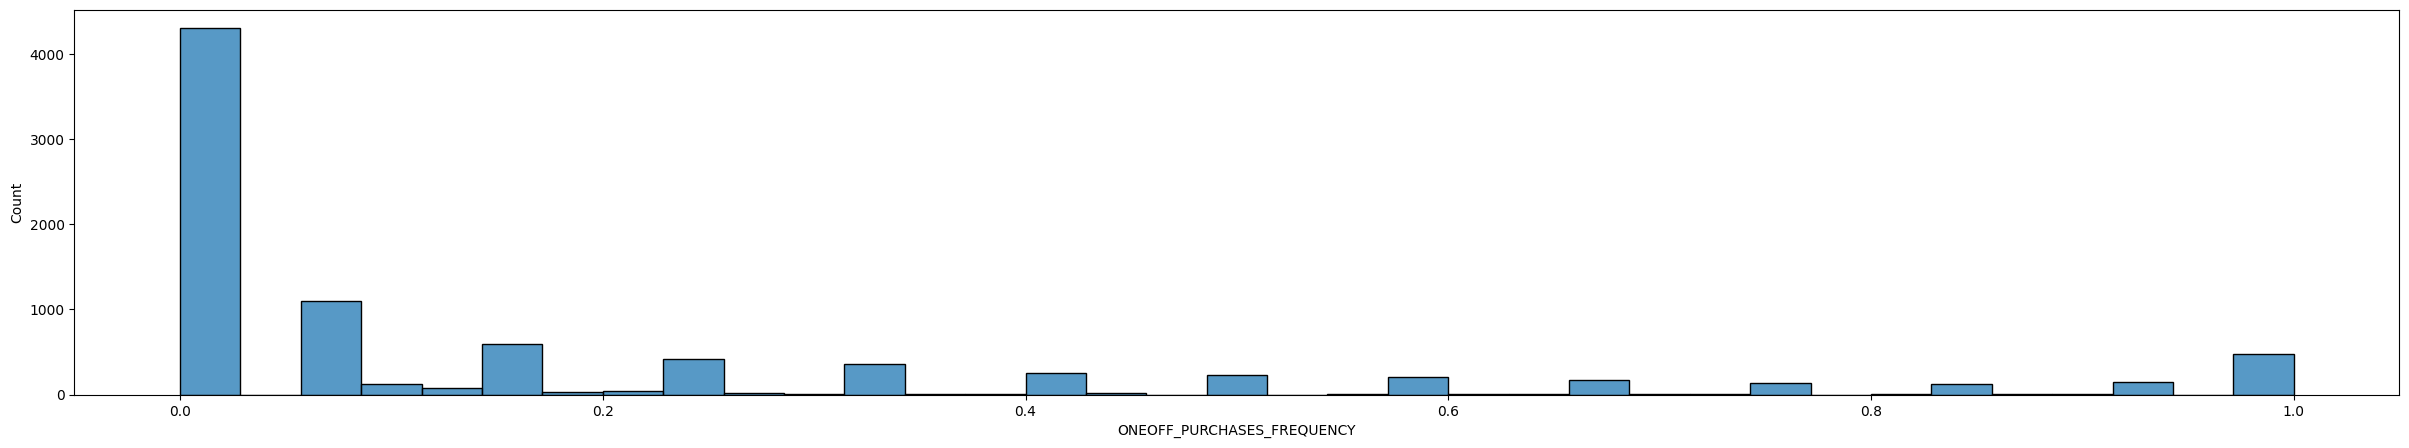

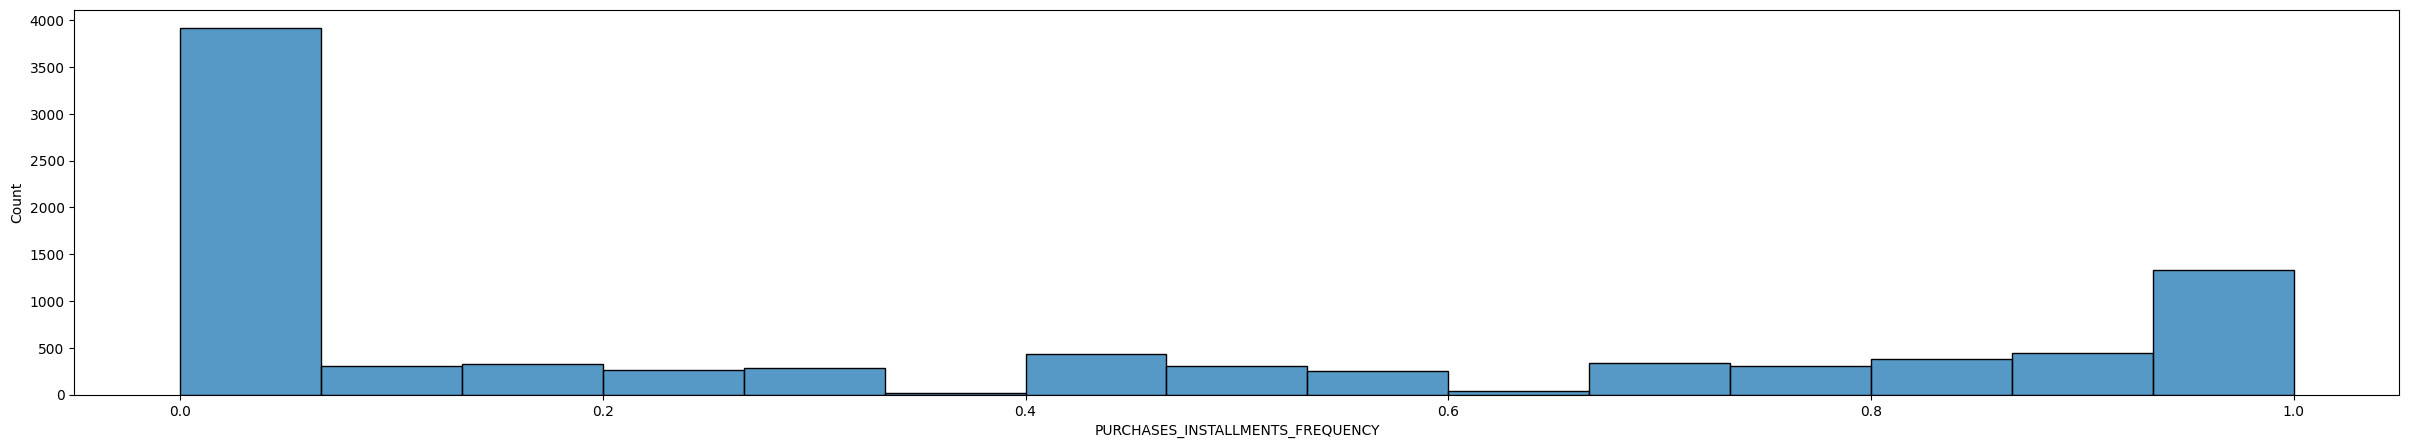

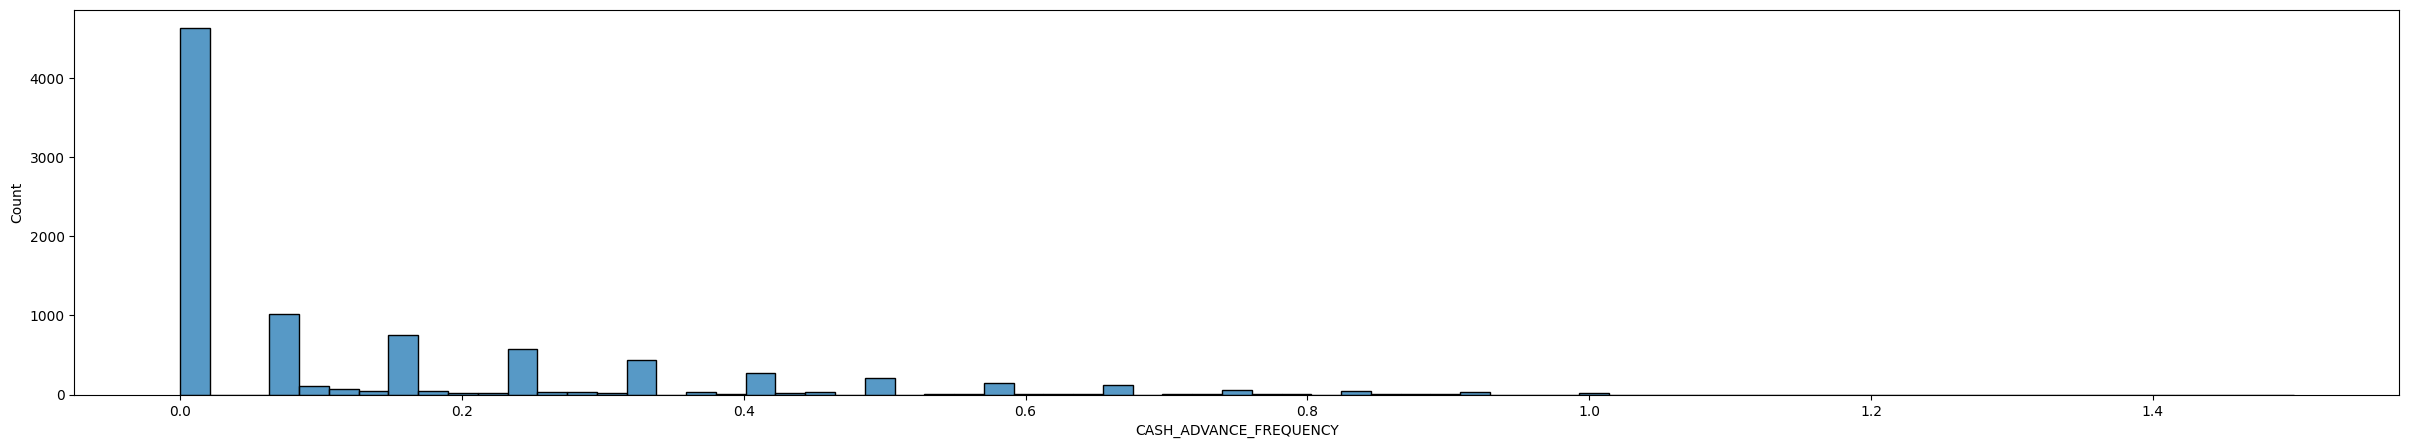

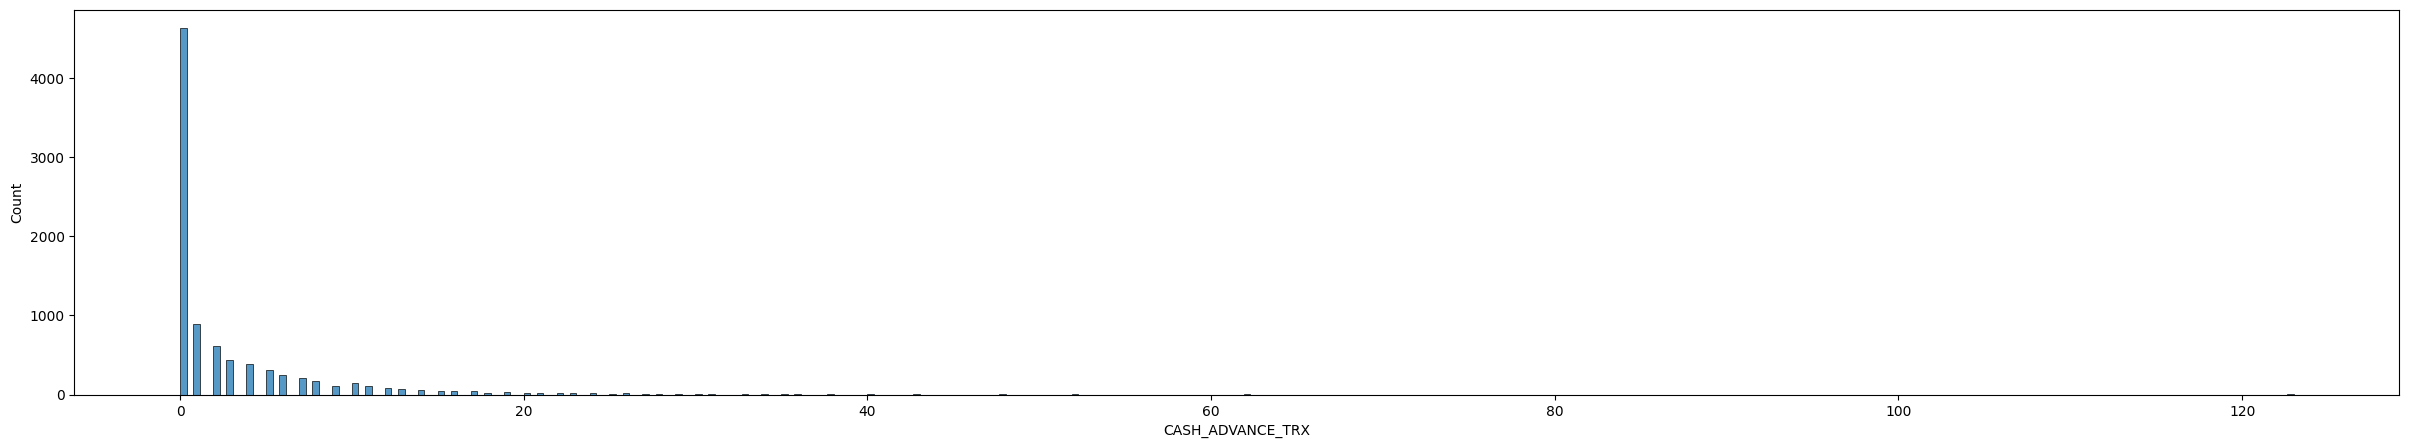

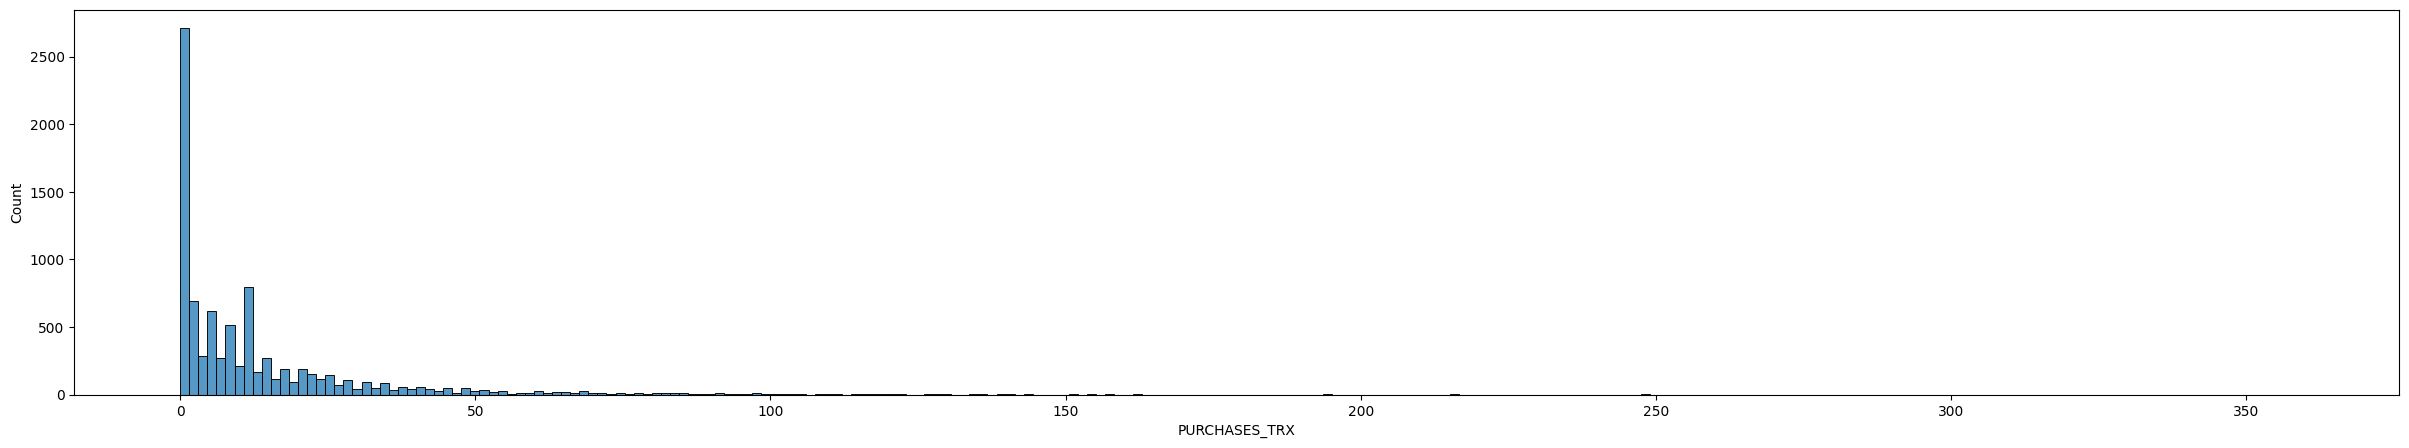

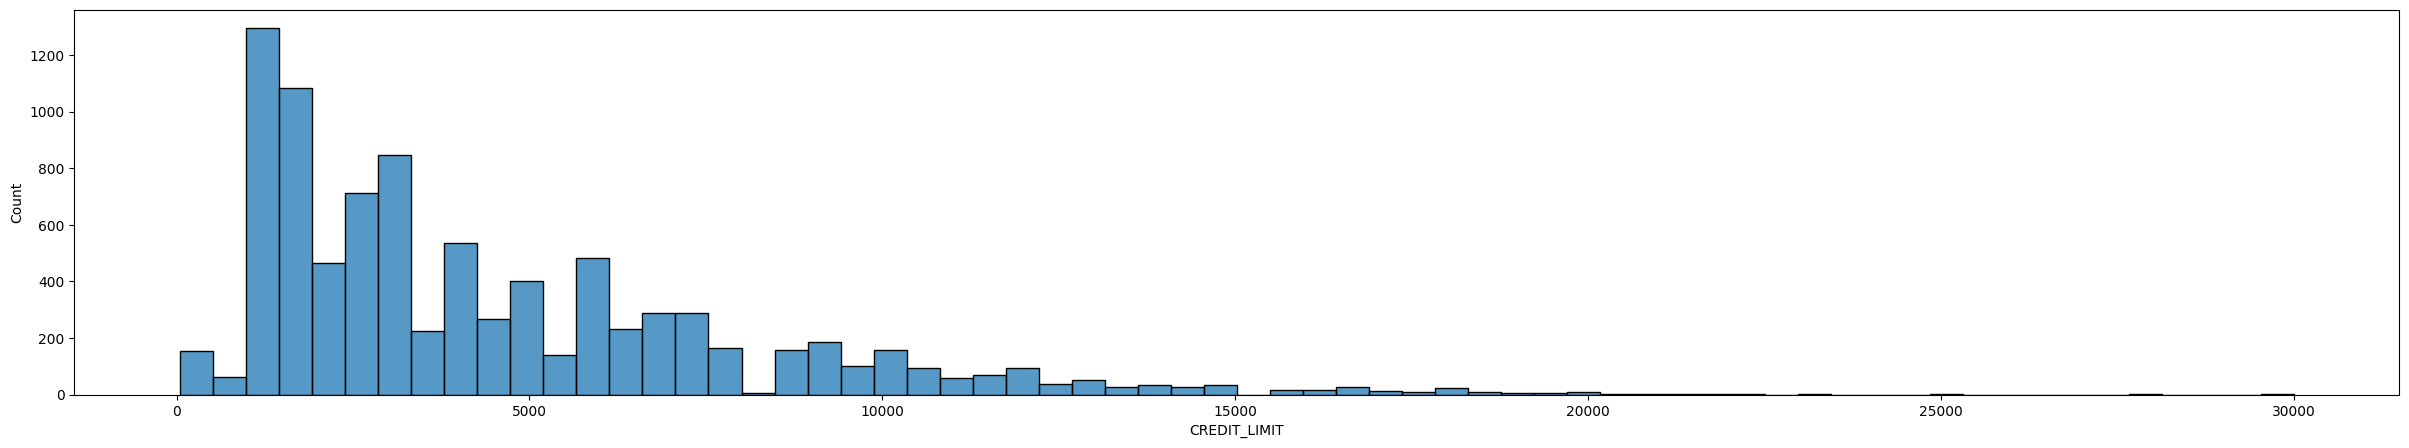

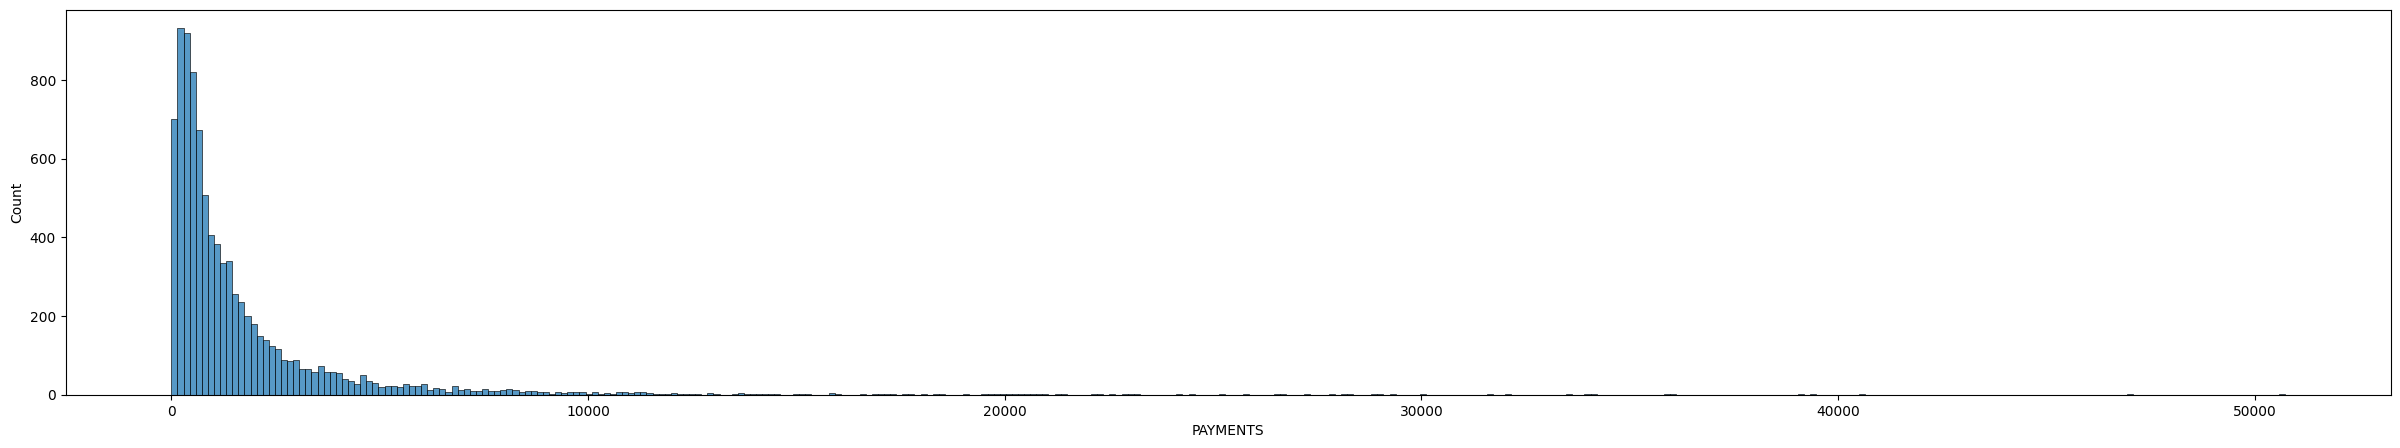

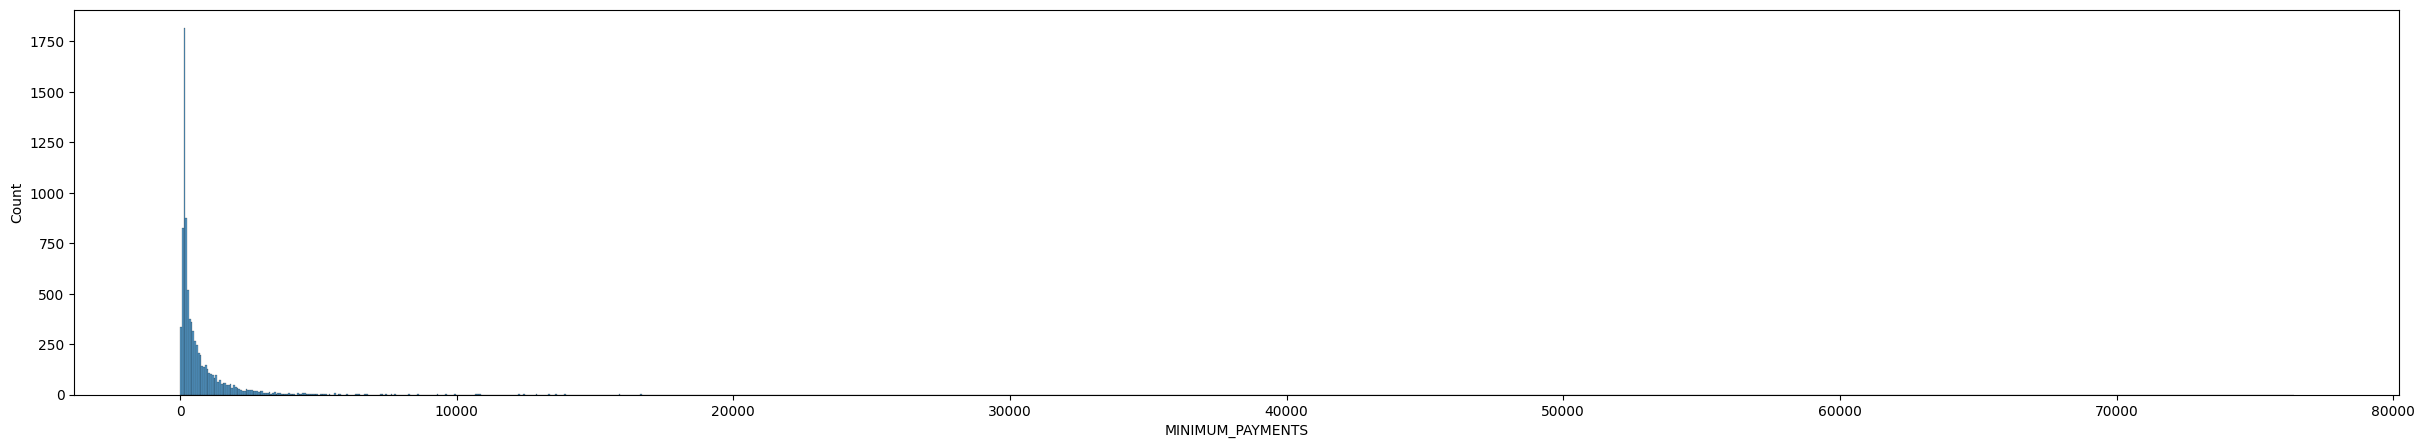

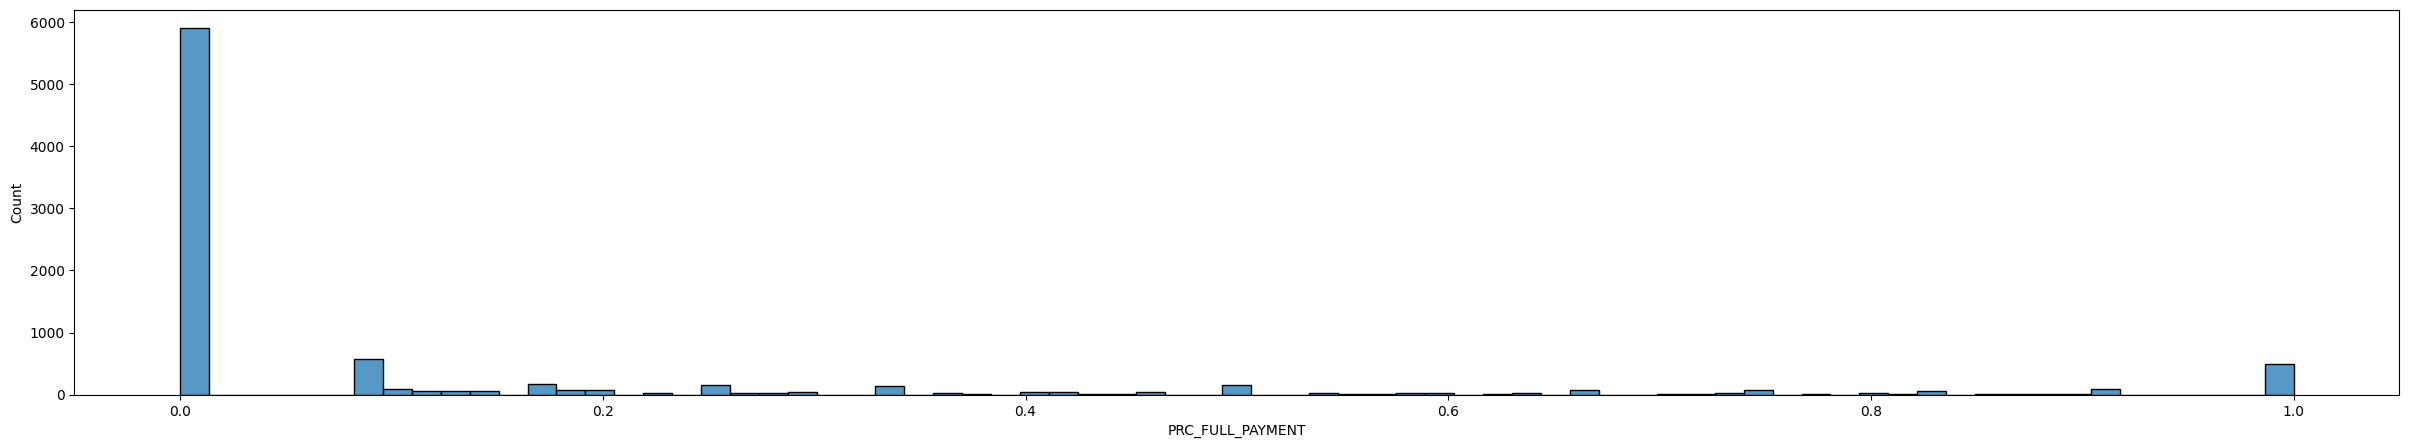

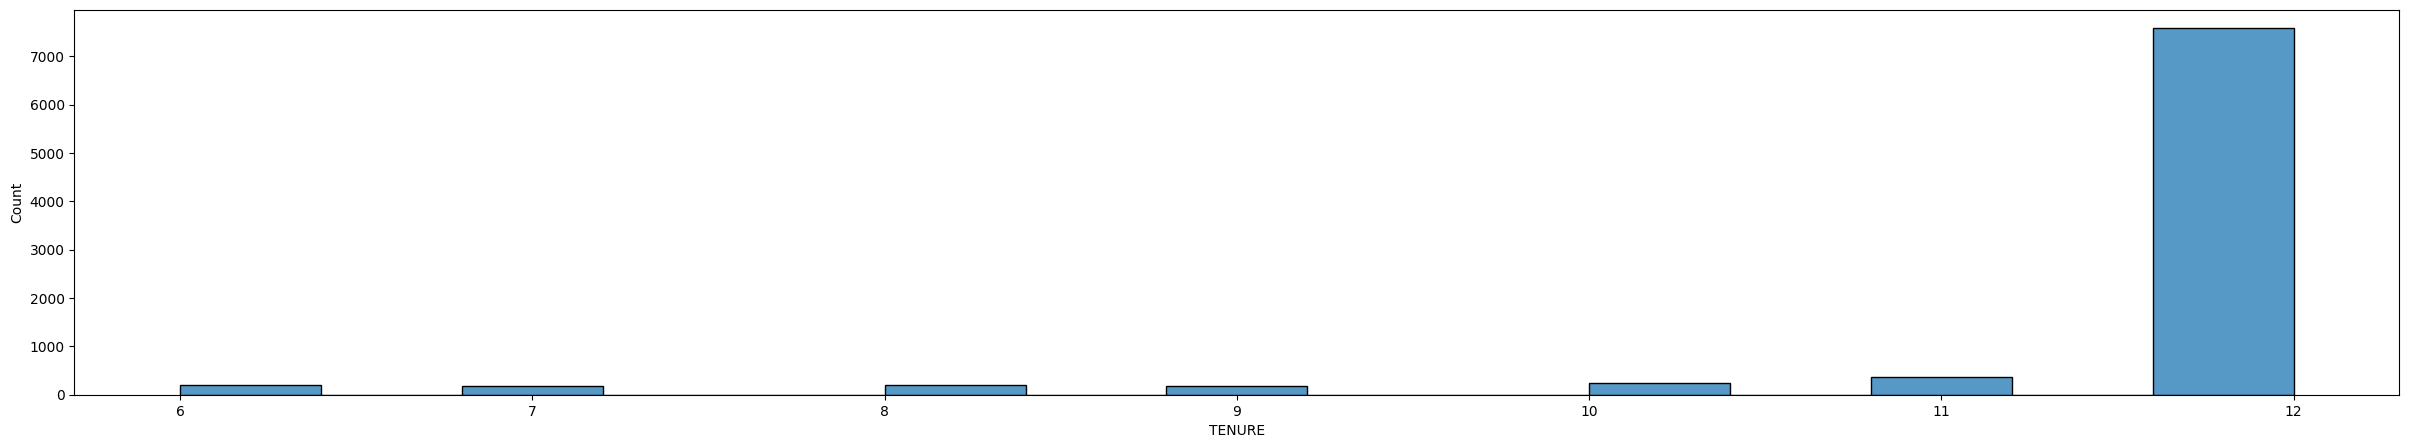

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(df[column])
    plt.show()

In [6]:
#imputing with median values using sklearn.impute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X)

df['MINIMUM_PAYMENTS_NEW'] = X
X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2)
df['CREDIT_LIMIT_NEW'] = X2
df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  PAYMEN

In [7]:
df.isnull().sum().sum()

0

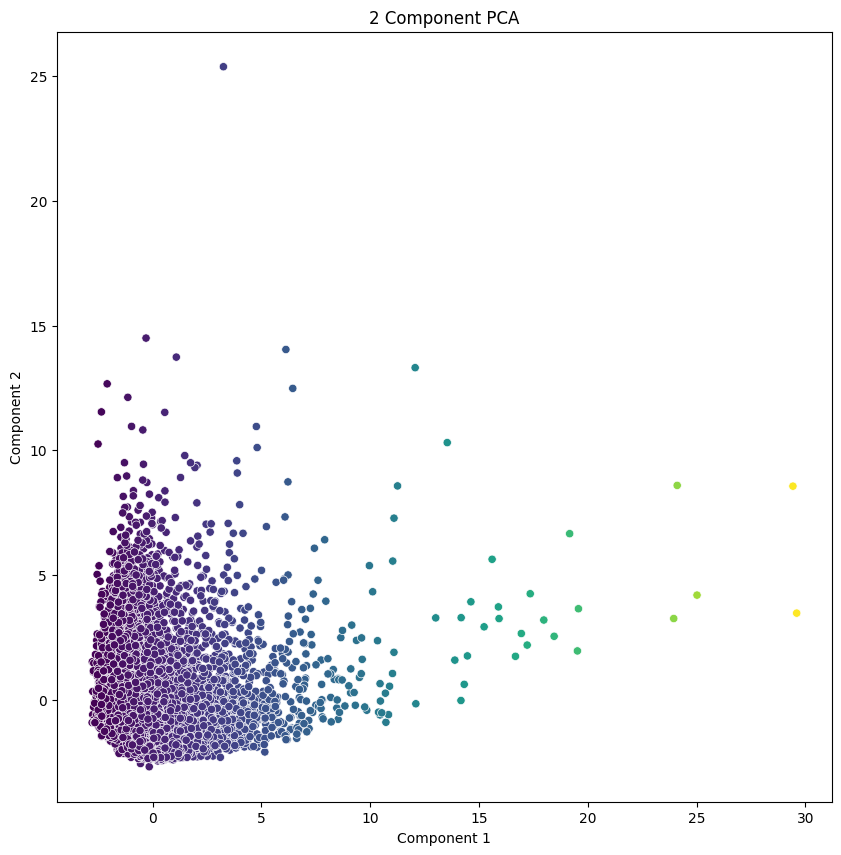

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.001s...
[t-SNE] Computed neighbors for 8950 samples in 0.884s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.468710
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.512451
[t-SNE] KL divergence after 300 iterations: 2.549361


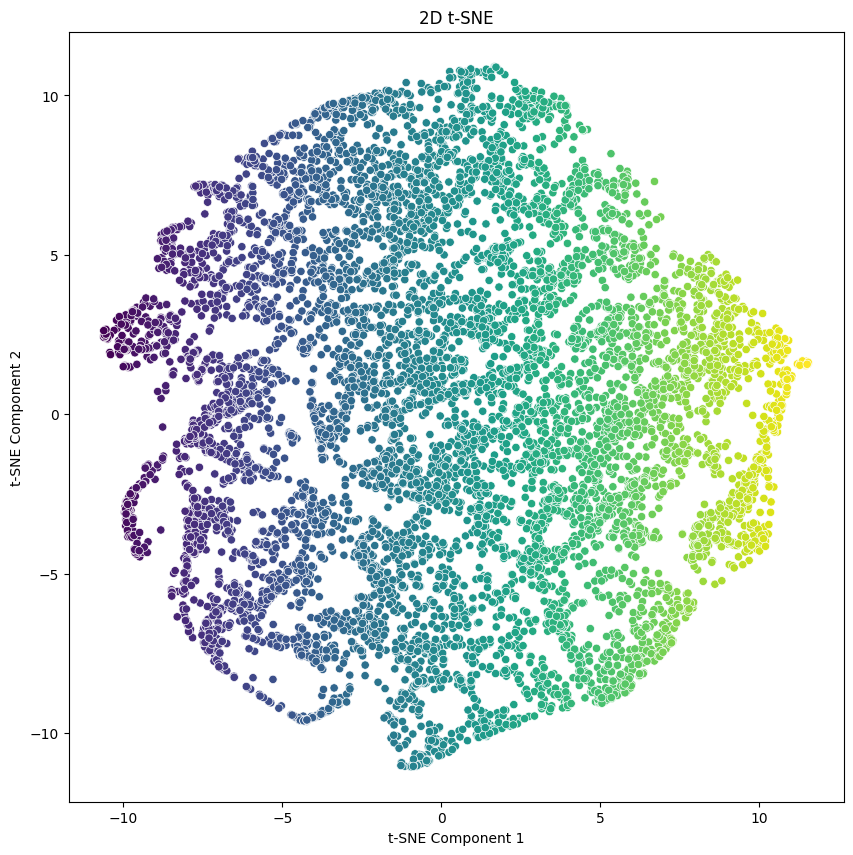

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.001s...
[t-SNE] Computed neighbors for 8950 samples in 1.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.468710
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.026604
[t-SNE] KL divergence after 300 iterations: 2.143032


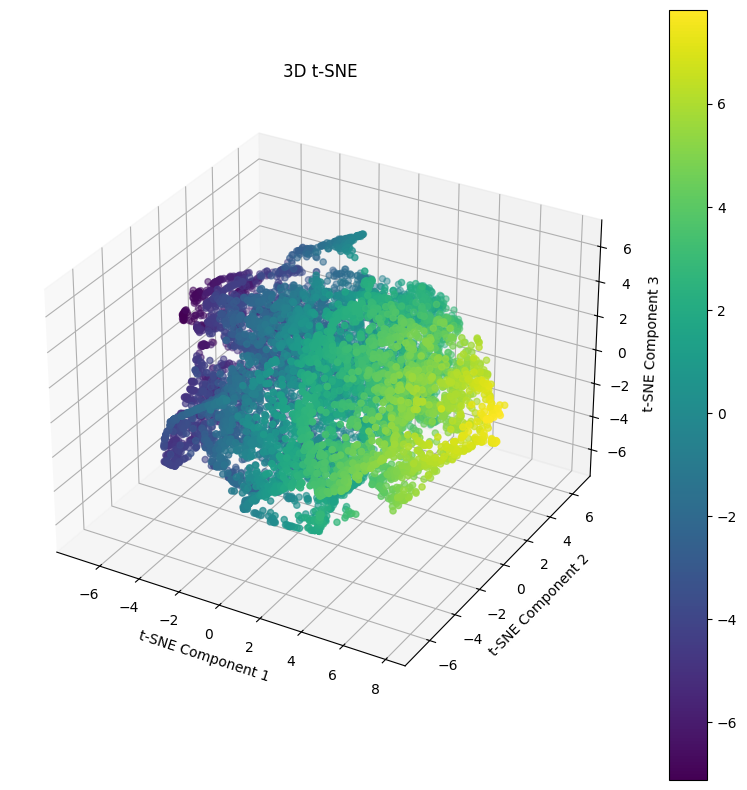

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def scale_data(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    return df_scaled

def pca_2d_visualization(df_scaled):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df_scaled)
    PCA_dataset = pd.DataFrame(data=principalComponents, columns=['component1', 'component2'])
    plt.figure(figsize=(10, 10))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('2 Component PCA')
    sns.scatterplot(x='component1', y='component2', data=PCA_dataset, palette='viridis', hue='component1', legend=False)
    plt.show()

def tsne_2d_visualization(df_scaled, perplexity=40, n_iter=300):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(df_scaled)
    TSNE_dataset = pd.DataFrame(data=tsne_results, columns=['tsne_component1', 'tsne_component2'])
    plt.figure(figsize=(10, 10))
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('2D t-SNE')
    sns.scatterplot(x='tsne_component1', y='tsne_component2', data=TSNE_dataset, palette='viridis', hue='tsne_component1', legend=False)
    plt.show()

def tsne_3d_visualization(df_scaled, perplexity=40, n_iter=300):
    tsne = TSNE(n_components=3, verbose=1, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(df_scaled)
    TSNE_dataset = pd.DataFrame(data=tsne_results, columns=['tsne_component1', 'tsne_component2', 'tsne_component3'])
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    plt.title('3D t-SNE')
    scatter = ax.scatter(xs=TSNE_dataset['tsne_component1'],
                         ys=TSNE_dataset['tsne_component2'],
                         zs=TSNE_dataset['tsne_component3'],
                         c=TSNE_dataset['tsne_component1'],
                         cmap='viridis')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    plt.colorbar(scatter)
    plt.show()
df_scaled = scale_data(df)
pca_2d_visualization(df_scaled)
tsne_2d_visualization(df_scaled)
tsne_3d_visualization(df_scaled)


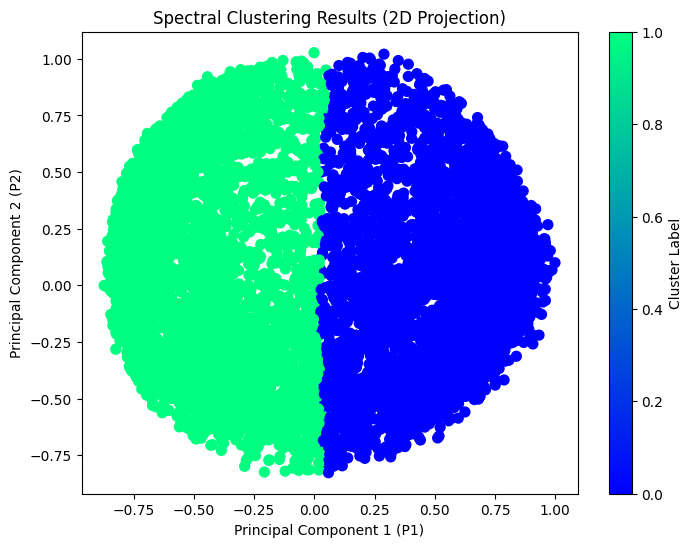

Silhouette Score: 0.447
Calinski-Harabasz Index: 8573.144
Davies-Bouldin Index: 0.933


In [9]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming raw_df is your original DataFrame with raw data
# Step 1: Scaling the Data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Standardize the features

# Step 2: Normalizing the Scaled Data using sklearn's normalize
X_normalized = normalize(X_scaled)  # Normalize to unit norm (L2 norm by default)

# Step 3: Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Step 4: Reducing the dimensions of the data using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_principal = pca.fit_transform(X_normalized)

# Convert the PCA result to a DataFrame and label the columns
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Step 5: Build the Spectral Clustering model with RBF affinity
spectral_model_rbf = SpectralClustering(n_clusters=2, affinity='rbf', random_state=42)

# Step 6: Training the model and storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Step 7: Add the cluster labels to the DataFrame
X_principal['Cluster'] = labels_rbf

# Step 8: Visualizing the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_rbf, cmap=plt.cm.winter, s=50)
plt.title("Spectral Clustering Results (2D Projection)")
plt.xlabel("Principal Component 1 (P1)")
plt.ylabel("Principal Component 2 (P2)")
plt.colorbar(label="Cluster Label")
plt.show()

# Step 9: Evaluate the clustering performance using metrics
# Silhouette Score
silhouette_avg = silhouette_score(X_principal[['P1', 'P2']], labels_rbf)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_principal[['P1', 'P2']], labels_rbf)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_principal[['P1', 'P2']], labels_rbf)
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")


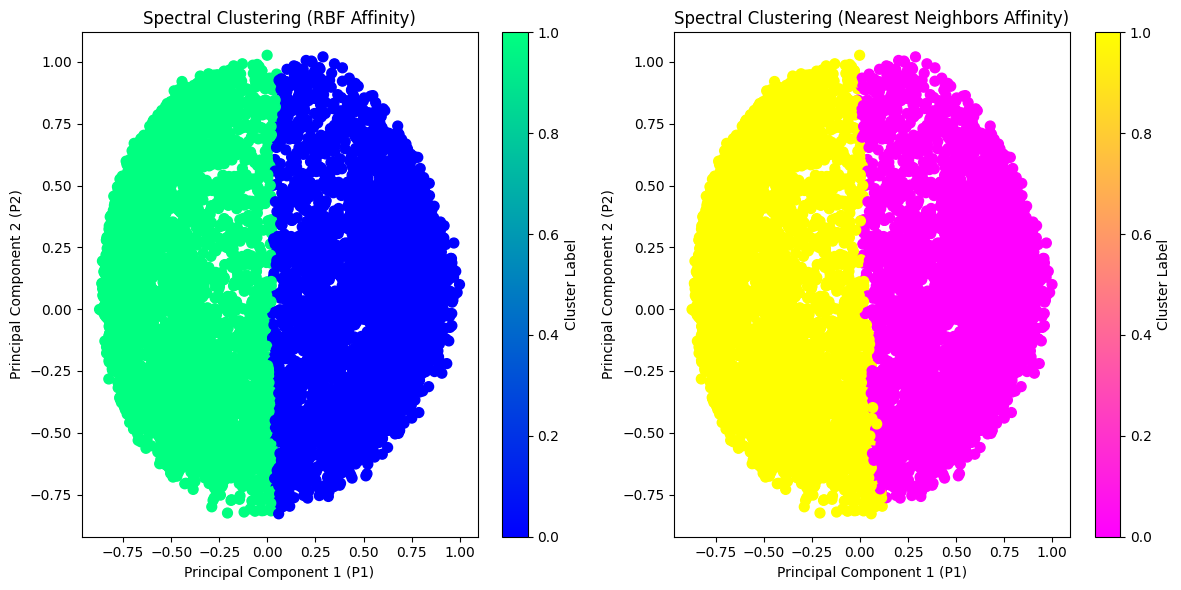

Spectral Clustering (RBF Affinity) Metrics:
Silhouette Score: 0.447
Calinski-Harabasz Index: 8573.144
Davies-Bouldin Index: 0.933


Spectral Clustering (Nearest Neighbors Affinity) Metrics:
Silhouette Score: 0.447
Calinski-Harabasz Index: 8542.944
Davies-Bouldin Index: 0.933


In [10]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming raw_df is your original DataFrame with raw data
# Step 1: Scaling the Data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Standardize the features

# Step 2: Normalizing the Scaled Data using sklearn's normalize
X_normalized = normalize(X_scaled)  # Normalize to unit norm (L2 norm by default)

# Step 3: Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Step 4: Reducing the dimensions of the data using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_principal = pca.fit_transform(X_normalized)

# Convert the PCA result to a DataFrame and label the columns
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Step 5: Build the Spectral Clustering model with RBF affinity
spectral_model_rbf = SpectralClustering(n_clusters=2, affinity='rbf', random_state=42)
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Step 6: Build the Spectral Clustering model with Nearest Neighbors affinity
spectral_model_nn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
labels_nn = spectral_model_nn.fit_predict(X_principal)

# Step 7: Add the cluster labels to the DataFrame for both models
X_principal['Cluster_RBF'] = labels_rbf
X_principal['Cluster_NN'] = labels_nn

# Step 8: Visualizing the clustering results for both models
plt.figure(figsize=(12, 6))

# Plotting RBF Clustering
plt.subplot(1, 2, 1)
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_rbf, cmap=plt.cm.winter, s=50)
plt.title("Spectral Clustering (RBF Affinity)")
plt.xlabel("Principal Component 1 (P1)")
plt.ylabel("Principal Component 2 (P2)")
plt.colorbar(label="Cluster Label")

# Plotting Nearest Neighbors Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_nn, cmap=plt.cm.spring, s=50)
plt.title("Spectral Clustering (Nearest Neighbors Affinity)")
plt.xlabel("Principal Component 1 (P1)")
plt.ylabel("Principal Component 2 (P2)")
plt.colorbar(label="Cluster Label")

plt.tight_layout()
plt.show()

# Step 9: Evaluate the clustering performance using metrics for both models

# RBF Model Metrics
silhouette_rbf = silhouette_score(X_principal[['P1', 'P2']], labels_rbf)
calinski_rbf = calinski_harabasz_score(X_principal[['P1', 'P2']], labels_rbf)
davies_rbf = davies_bouldin_score(X_principal[['P1', 'P2']], labels_rbf)

# Nearest Neighbors Model Metrics
silhouette_nn = silhouette_score(X_principal[['P1', 'P2']], labels_nn)
calinski_nn = calinski_harabasz_score(X_principal[['P1', 'P2']], labels_nn)
davies_nn = davies_bouldin_score(X_principal[['P1', 'P2']], labels_nn)

# Display the metrics for both models
print(f"Spectral Clustering (RBF Affinity) Metrics:")
print(f"Silhouette Score: {silhouette_rbf:.3f}")
print(f"Calinski-Harabasz Index: {calinski_rbf:.3f}")
print(f"Davies-Bouldin Index: {davies_rbf:.3f}")
print("\n")

print(f"Spectral Clustering (Nearest Neighbors Affinity) Metrics:")
print(f"Silhouette Score: {silhouette_nn:.3f}")
print(f"Calinski-Harabasz Index: {calinski_nn:.3f}")
print(f"Davies-Bouldin Index: {davies_nn:.3f}")


RBF Affinity slightly outperforms Nearest Neighbors Affinity

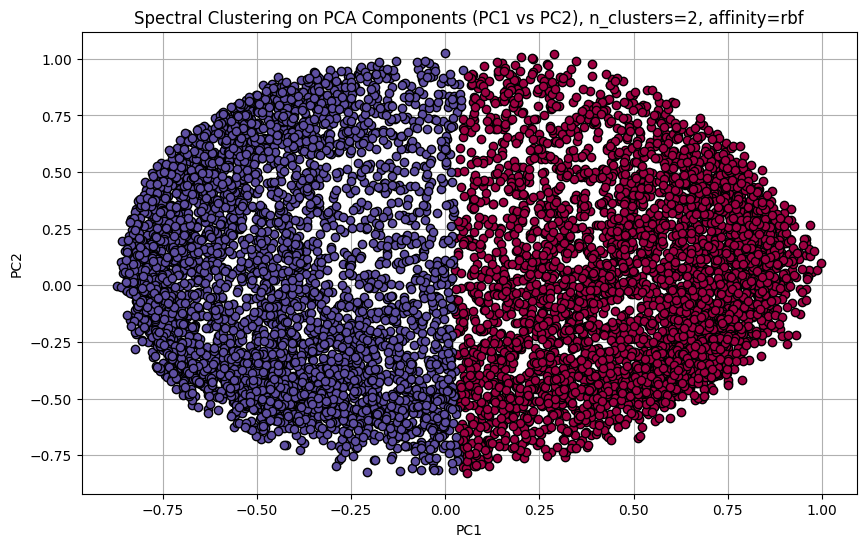

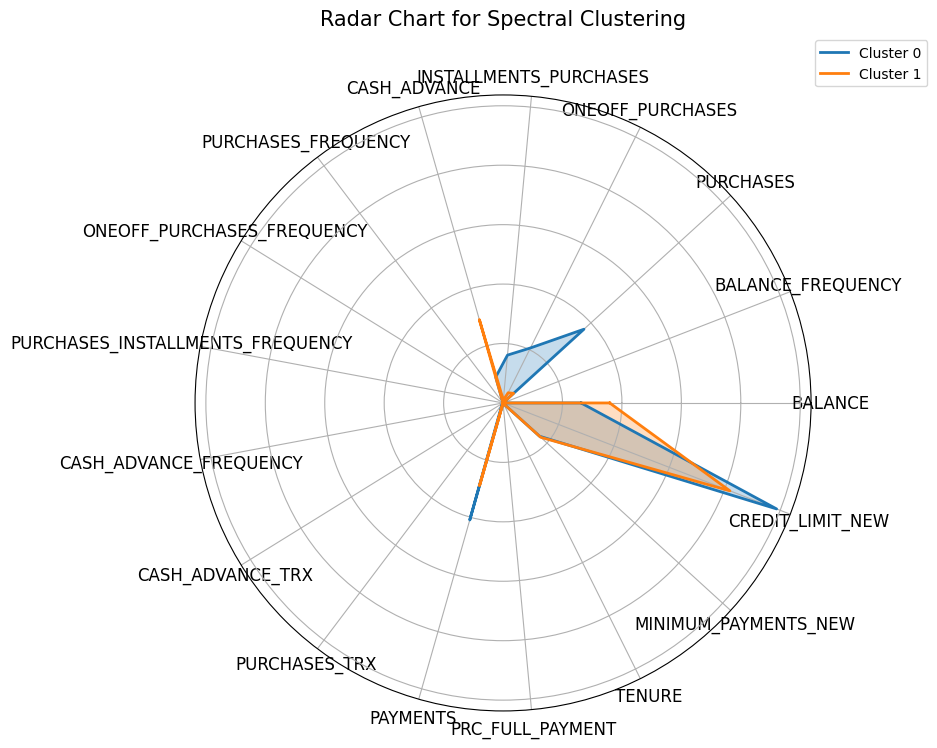

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Replace 'df' with your actual DataFrame

# Step 2: Normalizing the Scaled Data
X_normalized = normalize(X_scaled)  # Normalize to unit norm (L2 norm by default)

# Step 3: Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=df.columns)  # Use the original column names

# Step 4: Reducing the dimensions of the data using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_principal = pca.fit_transform(X_normalized)

# Convert the PCA result to a DataFrame and label the columns
pca_df = pd.DataFrame(X_principal, columns=['PC1', 'PC2'])

# Step 5: Define a function to apply Spectral Clustering and visualize
def apply_spectral_clustering_on_pca(pca_df, n_clusters, affinity='rbf', pc1='PC1', pc2='PC2'):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity=affinity, random_state=42)
    clusters = spectral.fit_predict(pca_df[[pc1, pc2]])

    # Add the cluster labels to the PCA DataFrame
    pca_df['Cluster'] = clusters

    # Visualize the clusters on the first two principal components
    plt.figure(figsize=(10, 6))
    unique_clusters = np.unique(clusters)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_clusters))]

    for k, col in zip(unique_clusters, colors):
        class_member_mask = (clusters == k)
        xy = pca_df[class_member_mask]
        plt.plot(xy[pc1], xy[pc2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f'Spectral Clustering on PCA Components ({pc1} vs {pc2}), n_clusters={n_clusters}, affinity={affinity}')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.grid(True)
    plt.show()

    return clusters

# Step 6: Applying Spectral Clustering with RBF affinity
n_clusters = 2  # Adjust the number of clusters as needed
clusters_rbf = apply_spectral_clustering_on_pca(pca_df, n_clusters=n_clusters, affinity='rbf')

# Add the cluster labels to the original DataFrame
df['Spectral_Cluster_RBF'] = clusters_rbf

# Step 7: Radar chart visualization function
def plot_radar_chart(df, cluster_column, title='Radar Chart'):
    cluster_means = df.groupby(cluster_column).mean()  # Mean of each feature by cluster
    labels = cluster_means.columns
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for idx, row in cluster_means.iterrows():
        values = row.tolist() + row.tolist()[:1]
        ax.plot(angles, values, label=f'Cluster {idx}', linewidth=2)
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(title, size=15, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

    plt.show()

# Step 8: Radar chart for Spectral Clustering
plot_radar_chart(df, 'Spectral_Cluster_RBF', title='Radar Chart for Spectral Clustering')


Cluster 0 might benefit from promotions on cash advance services.
Cluster 1 could be targeted with installment or one-off purchase offers.


**AFFINITY PROPGATATION**

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

# Ensure 'df' is numerical only and convert to NumPy for speed
numerical_df = df.select_dtypes(include=[np.number])
scaled_df = StandardScaler().fit_transform(numerical_df)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(scaled_df)

# Create PCA dataframe
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])

# Function to run Affinity Propagation for a given damping
def run_affinity_propagation(damping, data):
    model = AffinityPropagation(damping=damping, random_state=5)
    model.fit(data)
    return model.labels_

# List of damping values
damping_values = [0.5, 0.9]

# Run clustering in parallel
cluster_labels = Parallel(n_jobs=-1)(
    delayed(run_affinity_propagation)(damping, scaled_df) for damping in damping_values
)

# Add cluster labels to PCA dataframe
for i, damping in enumerate(damping_values):
    pca_df[f'cluster_{int(damping * 10):02}'] = cluster_labels[i]

# Display results
print("Unique cluster labels (damping=0.5):", np.unique(pca_df['cluster_05']))
print("Unique cluster labels (damping=0.9):", np.unique(pca_df['cluster_09']))
print(pca_df.head())


Unique cluster labels (damping=0.5): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 2

In [14]:
# Number of clusters for damping=0.5
num_clusters_05 = len(np.unique(labels_05))

# Number of clusters for damping=0.9
num_clusters_09 = len(np.unique(labels_09))

print("Number of clusters (damping=0.5):", num_clusters_05)
print("Number of clusters (damping=0.9):", num_clusters_09)


Number of clusters (damping=0.5): 347
Number of clusters (damping=0.9): 348


**CONCLUSION**

Affinity Propagation may not be the most suitable clustering algorithm for this particular dataset. The excessive number of clusters indicates that the algorithm is struggling to find coherent grouping